# TableMetadataTools.jl tutorial

## Bogumił Kamiński

In this tutorial TableMetadataTools.jl is already installed.

If you want to install it on your own just do:

```
] add https://github.com/JuliaData/TableMetadataTools.jl
```

This tutorial assumes you know what metadata can be used for. If not I recommend you start with reading the [Metadata](https://dataframes.juliadata.org/stable/lib/metadata/) section of the DataFrames.jl manual.

### Setup steps

Load required packages:

In [1]:
using DataFrames

In [2]:
using Plots

In [3]:
using TableMetadataTools

Check the versions of packages used

(IJulia.jl is added to Project.toml so that you can easily run this notebook when starting Julia in /docs directory)

In [4]:
] status

Status `C:\WORK\dev\TableMetadataTools\docs\Project.toml`
  [a93c6f00] DataFrames v1.4.3
  [7073ff75] IJulia v1.23.3
  [91a5bcdd] Plots v1.36.1
  [9ce81f87] TableMetadataTools v0.1.0 `https://github.com/JuliaData/TableMetadataTools.jl#main`


Create a data frame we will use.

Data and metadata is taken from [The World Bank website](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?locations=PL)

In [5]:
df = DataFrame(year=2018:2021, 
               gdppc=[15468.48222, 15732.20313, 15742.45373, 17840.92105])

Row,year,gdppc
,Int64,Float64
1,2018,15468.5
2,2019,15732.2
3,2020,15742.5
4,2021,17840.9


Populate it with metadata:

In [6]:
caption!(df, "GDP per capita of Poland");
note!(df, "World Bank national accounts data, and OECD National Accounts data files.");
metadata!(df, "License", "CC BY-4.0");
metadata!(df, "Periodicity", "Annual");
label!(df, :gdppc, "GDP per capita (current USD)");
note!(df, :gdppc, "GDP: gross domestic product");
note!(df, :gdppc, "population taken in midyear", append=true);

Note that we have used:
* standard `metadata!` function from DataAPi.jl; this function by default creates metadata with `:default` style.
* special convenience functions: `caption!`, `note!`, and `label!` defined in TableMetadataTools.jl; all of them create metadata with `:note` style. Additionally `note!` allows for appending metadata to existing `"note"` metadata (adding a new line, as we will soon see).

### Inspecting metadata

First we fetch caption of our table:

In [7]:
caption(df)

"GDP per capita of Poland"

Now check labels of columns:

In [8]:
label(df, :year)

"year"

In [9]:
label(df, :gdppc)

"GDP per capita (current USD)"

In [10]:
labels(df)

2-element Vector{String}:
 "year"
 "GDP per capita (current USD)"

Note that if column label is missing then just column name is returned.

Finally check notes for both whole table and columns:

In [11]:
println(note(df))

World Bank national accounts data, and OECD National Accounts data files.


In [12]:
println(note(df, :year))

In [13]:
println(note(df, :gdppc))

GDP: gross domestic product
population taken in midyear


Note two things:
* for `:year` column there were no notes so an empty string is returned
* for `:gdppc` column there were appended notes and they are both kept; separated by a newline

Let us check what all metadata values are stored for our data frame:

In [14]:
metadata(df, style=true)

Dict{String, Tuple{String, Symbol}} with 4 entries:
  "note"        => ("World Bank national accounts data, and OECD National Accou…
  "Periodicity" => ("Annual", :default)
  "caption"     => ("GDP per capita of Poland", :note)
  "License"     => ("CC BY-4.0", :default)

In [15]:
foreach(colmetadata(df, style=true)) do (k, v)
    println("Column $k")
    display(v)
    println()
end

Column gdppc


Dict{String, Tuple{String, Symbol}} with 2 entries:
  "label" => ("GDP per capita (current USD)", :note)
  "note"  => ("GDP: gross domestic product\npopulation taken in midyear", :note)

All metadata looks as expected and has correct style.

It is convenient to print metadata using TOML format.

Here with style information:

In [16]:
println(meta2toml(df))

style = true

[colmetadata.gdppc]
label = ["GDP per capita (current USD)", "note"]
note = ["GDP: gross domestic product\npopulation taken in midyear", "note"]

[metadata]
License = ["CC BY-4.0", "default"]
Periodicity = ["Annual", "default"]
caption = ["GDP per capita of Poland", "note"]
note = ["World Bank national accounts data, and OECD National Accounts data files.", "note"]



And here without it:

In [17]:
println(meta2toml(df, style=false))

style = false

[colmetadata.gdppc]
label = "GDP per capita (current USD)"
note = "GDP: gross domestic product\npopulation taken in midyear"

[metadata]
License = "CC BY-4.0"
Periodicity = "Annual"
caption = "GDP per capita of Poland"
note = "World Bank national accounts data, and OECD National Accounts data files."



### Updating metadata style and using TOML serialization

Let us check style of all `"License"` metadata to `:note` (`:note` style is default in `setmetadatastyle!`):

In [18]:
setmetadatastyle!(==("License"), df);

Note that `==("License")` is a condition specifying which metadata style should be changed. In this case only metadata whose name is exactly `"License"`, but we could use an arbitrary rule here.

In [19]:
metadata(df, "License", style=true)

("CC BY-4.0", :note)

Now let us save the metadata to TOML without style and restore it (note that we could easily save this TOML to disk for persistence of metadata):

In [20]:
toml_meta = meta2toml(df, style=false);
println(toml_meta)

style = false

[colmetadata.gdppc]
label = "GDP per capita (current USD)"
note = "GDP: gross domestic product\npopulation taken in midyear"

[metadata]
License = "CC BY-4.0"
Periodicity = "Annual"
caption = "GDP per capita of Poland"
note = "World Bank national accounts data, and OECD National Accounts data files."



In [21]:
toml2meta!(df, toml_meta)

Row,year,gdppc
,Int64,Float64
1,2018,15468.5
2,2019,15732.2
3,2020,15742.5
4,2021,17840.9


In [22]:
println(meta2toml(df))

style = true

[colmetadata.gdppc]
label = ["GDP per capita (current USD)", "default"]
note = ["GDP: gross domestic product\npopulation taken in midyear", "default"]

[metadata]
License = ["CC BY-4.0", "default"]
Periodicity = ["Annual", "default"]
caption = ["GDP per capita of Poland", "default"]
note = ["World Bank national accounts data, and OECD National Accounts data files.", "default"]



Note that since we have not saved metadata style information in TOML, by default `:default` was restored.

Change all metadata style to `:note` (if we skip passing condition all metadata gets `:note` style):

In [23]:
setallmetadatastyle!(df);

In [24]:
println(meta2toml(df))

style = true

[colmetadata.gdppc]
label = ["GDP per capita (current USD)", "note"]
note = ["GDP: gross domestic product\npopulation taken in midyear", "note"]

[metadata]
License = ["CC BY-4.0", "note"]
Periodicity = ["Annual", "note"]
caption = ["GDP per capita of Poland", "note"]
note = ["World Bank national accounts data, and OECD National Accounts data files.", "note"]



### Interchanging metadata between tables using dictionaries

Create a copy of our data frame

In [25]:
df2 = copy(df)

Row,year,gdppc
,Int64,Float64
1,2018,15468.5
2,2019,15732.2
3,2020,15742.5
4,2021,17840.9


In [26]:
println(meta2toml(df2))

style = true

[colmetadata.gdppc]
label = ["GDP per capita (current USD)", "note"]
note = ["GDP: gross domestic product\npopulation taken in midyear", "note"]

[metadata]
License = ["CC BY-4.0", "note"]
Periodicity = ["Annual", "note"]
caption = ["GDP per capita of Poland", "note"]
note = ["World Bank national accounts data, and OECD National Accounts data files.", "note"]



Now drop all metadata from it:

In [27]:
emptymetadata!(df2)
emptycolmetadata!(df2)
println(meta2toml(df2))

style = true

[colmetadata]

[metadata]



We will restore this metadata from `df` data frame (equally well these dictionaries could be saved somewhere on disk).

First without style information (`:default` is used):

In [28]:
dict2metadata!(df2, metadata(df))
dict2colmetadata!(df2, colmetadata(df))
println(meta2toml(df2))

style = true

[colmetadata.gdppc]
label = ["GDP per capita (current USD)", "default"]
note = ["GDP: gross domestic product\npopulation taken in midyear", "default"]

[metadata]
License = ["CC BY-4.0", "default"]
Periodicity = ["Annual", "default"]
caption = ["GDP per capita of Poland", "default"]
note = ["World Bank national accounts data, and OECD National Accounts data files.", "default"]



Now with style:

In [29]:
dict2metadata!(df2, metadata(df, style=true), style=true)
dict2colmetadata!(df2, colmetadata(df, style=true), style=true)
println(meta2toml(df2))

style = true

[colmetadata.gdppc]
label = ["GDP per capita (current USD)", "note"]
note = ["GDP: gross domestic product\npopulation taken in midyear", "note"]

[metadata]
License = ["CC BY-4.0", "note"]
Periodicity = ["Annual", "note"]
caption = ["GDP per capita of Poland", "note"]
note = ["World Bank national accounts data, and OECD National Accounts data files.", "note"]



### Tracking operations

You can use `@track` macro to record operations performed on a data frame:

In [30]:
df_detail = DataFrame(group=repeat(1:2, 4), value=1:8)

Row,group,value
,Int64,Int64
1,1,1
2,2,2
3,1,3
4,2,4
5,1,5
6,2,6
7,1,7
8,2,8


In [31]:
@track gdf_agg = combine(groupby(df_detail, :group, sort=true), :value => sum, ungroup=false)

Row,group,value_sum
,Int64,Int64
1,1,16
Row,group,value_sum
,Int64,Int64
1,2,20


Note that a metadata entry is added tracking the operation that lead to the obtaining parent data frame of the result of the operation.

In [32]:
println(meta2toml(parent(gdf_agg)))

style = true

[colmetadata]

[metadata]
"track_2022-11-13T21:17:40.609" = ["gdf_agg = combine(groupby(df_detail, :group, sort = true), :value => sum, ungroup = false)", "note"]



This works because in DataFrames.jl:
* `:note` style metadata can be added to any object supporting metadata and tracking metadata has `:note` style, because it is time-stamped.
* although `GroupedDataFrame` does not support metadata we internally call `parent` to work around this.

Now let us track several operations:

In [4]:
@track df = DataFrame(col = [4, 1, 3, 2])

Row,col
,Int64
1,4
2,1
3,3
4,2


In [5]:
@track sort!(df)

Row,col
,Int64
1,1
2,2
3,3
4,4


In [6]:
@track transform!(df, :col => ByRow(log))

Row,col,col_log
,Int64,Float64
1,1,0.0
2,2,0.693147
3,3,1.09861
4,4,1.38629


In [7]:
@track transform!(df, :col => ByRow(exp))

Row,col,col_log,col_exp
,Int64,Float64,Float64
1,1,0.0,2.71828
2,2,0.693147,7.38906
3,3,1.09861,20.0855
4,4,1.38629,54.5982


Let us check if they got tracked:

In [8]:
metadata(df)

Dict{String, String} with 4 entries:
  "track_2022-11-13T22:43:06.801" => "transform!(df, :col => ByRow(log))"
  "track_2022-11-13T22:42:59.481" => "sort!(df)"
  "track_2022-11-13T22:43:13.474" => "transform!(df, :col => ByRow(exp))"
  "track_2022-11-13T22:42:50.522" => "df = DataFrame(col = [4, 1, 3, 2])"

Now do the same but just printing the performed operations in chronological order:

In [15]:
tracklog(df)

df = DataFrame(col = [4, 1, 3, 2])
sort!(df)
transform!(df, :col => ByRow(log))
transform!(df, :col => ByRow(exp))


### A final step - let us see the metadata at work

First - do pretty printing of the table:

In [33]:
show(df)

4×2 DataFrame
 Row │ year   gdppc   
     │ Int64  Float64 
─────┼────────────────
   1 │  2018  15468.5
   2 │  2019  15732.2
   3 │  2020  15742.5
   4 │  2021  17840.9

In [34]:
show(df, header=labels(df), title=caption(df))

GDP per capita of Poland
 Row │ year  GDP per capita (current USD) 
─────┼────────────────────────────────────
   1 │ 2018                       15468.5
   2 │ 2019                       15732.2
   3 │ 2020                       15742.5
   4 │ 2021                       17840.9

In [35]:
df

Row,year,gdppc
,Int64,Float64
1,2018,15468.5
2,2019,15732.2
3,2020,15742.5
4,2021,17840.9


In [36]:
show(stdout, MIME("text/html"), df, header=labels(df), top_left_str=caption(df))

Row,year,GDP per capita (current USD)
1,2018,15468.5
2,2019,15732.2
3,2020,15742.5
4,2021,17840.9


Now customize a plot:

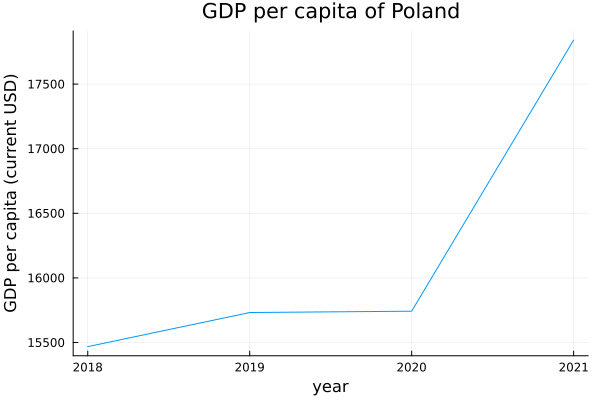

In [37]:
plot(df.year, df.gdppc, xlabel=label(df, :year), ylabel=label(df, :gdppc), title=caption(df), legend=false)